<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/chisq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter distinct (no repeating) x values, separated by spaces: 1 2 3
Enter the repeated measurements of y for each distinct x value (separated by ';'): 2.1 2.2 2.3; 3.1 3.2 3.3; 4.1 4.2 4.4
Enter the coefficient of the dependent variable: (Enter 1 if no coefficient) 1
What is the functional relationship between the dependent and measured variables?
1. Dependent variable is the measured variable.
2. Dependent variable is the square of the measured variable.
3. Dependent variable is the square root of the measured variable.
4. Dependent variable is the log of the measured variable.
5. Dependent variable is the reciprocal of the measured variable.
Select an option (1-5): 1
Enter the coefficient of the independent variable: (Enter 1 if no coefficient) 1
What is the functional relationship between the independent and measured variables?
1. Independent variable is the measured variable.
2. Independent variable is the square of the measured variable.
3. Independent variable is the square root o

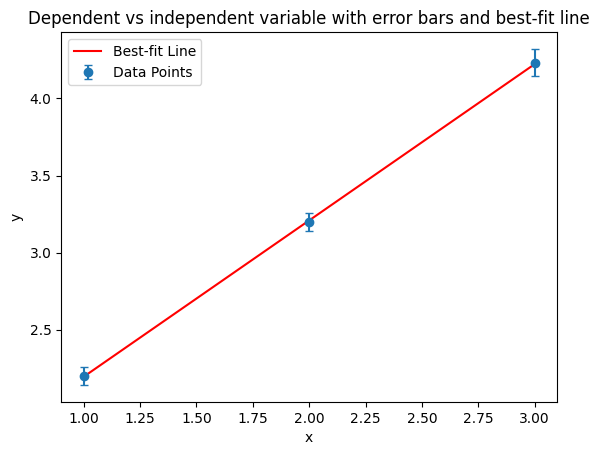

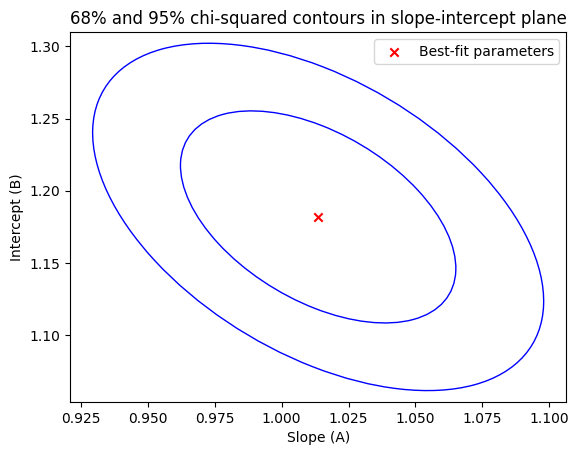

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import minimize_scalar

def mean(arr):
    return np.mean(arr)

def plot_chi_squared_ellipses(A_best, B_best, var_A, var_B, cov_AB):
    fig, ax = plt.subplots()
    ax.scatter(A_best, B_best, color='red', marker='x', label='Best-fit parameters')

    # Define the chi-squared contours at delta_chi2 = 2.3 and delta_chi2 = 6.17
    delta_chi2 = [2.3, 6.17]

    for chi2 in delta_chi2:
        # Calculate the semi-major and semi-minor axes and rotation angle for the ellipse
        a = np.sqrt(2.0 * chi2 * var_A)
        b = np.sqrt(2.0 * chi2 * var_B)
        theta = 0.5 * np.arctan(2.0 * cov_AB / (var_A - var_B))
        theta = np.degrees(theta)

        # Create the ellipse
        ellipse = Ellipse(xy=(A_best, B_best), width=a * 2, height=b * 2, angle=theta, edgecolor='blue', fill=False)
        ax.add_patch(ellipse)

    ax.set_xlabel('Slope (A)')
    ax.set_ylabel('Intercept (B)')
    ax.legend(loc='best')
    plt.title('68% and 95% chi-squared contours in slope-intercept plane')
    plt.show()

def get_distinct_x_values():
    while True:
        # Ask the user to enter the data points for x (space-separated)
        x_input = input("Enter distinct (no repeating) x values, separated by spaces: ")
        x = np.array([float(val) for val in x_input.split()])
        
        # Check if all x values are distinct
        if len(np.unique(x)) == len(x):
            return x
        else:
            print("Error: All x values must be distinct. Please enter distinct (no repeating) x values again.")

# Get distinct x values from user input
x = get_distinct_x_values()

# Ask the user to enter the repeated measurements of y for each distinct x value
y_input = input("Enter the repeated measurements of y for each distinct x value (separated by ';'): ")
y_measurements = [np.array([float(val) for val in group.split()]) for group in y_input.split(';')]

# Verify that the number of x values matches the number of groups of y measurements
if len(x) != len(y_measurements):
    print("Error: The number of x values must match the number of groups of y measurements.")
    exit()

# Calculate the mean and standard error of the dependent variable
y_mean = np.array([mean(group) for group in y_measurements])
sigma_y = np.array([np.std(group, ddof=1) / np.sqrt(len(group)) for group in y_measurements])


# Function to validate yes/no input
def get_yes_no_input(prompt):
    while True:
        response = input(prompt).strip().lower()
        if response in ['y', 'n']:
            return response
        else:
            print("Invalid input. Please enter 'y' or 'n'.")

# Function to validate numerical input within a given range
def get_numerical_input(prompt, lower_bound, upper_bound):
    while True:
        try:
            response = int(input(prompt))
            if lower_bound <= response <= upper_bound:
                return response
            else:
                print(f"Invalid input. Please enter a number between {lower_bound} and {upper_bound}.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Validate input for coefficient in the dependent variable
K = float(input("Enter the coefficient of the dependent variable: "))

# Validate input for functional relationship between dependent and measured variables
print("What is the functional relationship between the dependent and measured variables?")
print("1. Dependent variable is the measured variable.")
print("2. Dependent variable is the square of the measured variable.")
print("3. Dependent variable is the square root of the measured variable.")
print("4. Dependent variable is the log of the measured variable.")
print("5. Dependent variable is the reciprocal of the measured variable.")
relationship_option = get_numerical_input("Select an option (1-5): ", 1, 5)

# Update the equation for y_mean and yerr based on the selected option
if relationship_option == 1:
    yerr = K * sigma_y
    y = K * y_mean
elif relationship_option == 2:
    yerr = K * 2 * sigma_y * y_mean
    y = K * y_mean**2
elif relationship_option == 3:
    yerr = K * 0.5 * sigma_y * np.sqrt(1 / y_mean)
    y = K * np.sqrt(y_mean)
elif relationship_option == 4:
    yerr = K * sigma_y / y_mean
    y = K * np.log(y_mean)
elif relationship_option == 5:
    yerr = K * sigma_y / (y_mean ** 2)
    y = K * 1/y_mean

# Validate input for coefficient in the independent variable
K2 = float(input("Enter the coefficient of the independent variable: "))

# Validate input for functional relationship between independent and measured variables
print("What is the functional relationship between the independent and measured variables?")
print("1. Independent variable is the measured variable.")
print("2. Independent variable is the square of the measured variable.")
print("3. Independent variable is the square root of the measured variable.")
print("4. Independent variable is the log of the measured variable.")
print("5. Independent variable is the reciprocal of the measured variable.")
relationship_option2 = get_numerical_input("Select an option (1-5): ", 1, 5)

# Update the equation for y_mean and yerr based on the selected option
if relationship_option2 == 1:
    x = K2 * x
elif relationship_option2 == 2:
    x = K2 * x**2
elif relationship_option2 == 3:
    x = K2 * np.sqrt(x)
elif relationship_option2 == 4:
    x = K2* np.log(x)
elif relationship_option2 == 5:
    x = K2 * 1/x

# calculate sums needed to calculate chi-squared in closed-form
s_yy = sum(y ** 2 / yerr ** 2)
s_xx = sum(x ** 2 / yerr ** 2)
s_0 = sum(1 / yerr ** 2)
s_xy = sum((y * x) / yerr ** 2)
s_y = sum(y / yerr ** 2)
s_x = sum(x / yerr ** 2)

# Calculate the best-fit slope and intercept
A_best = (s_0 * s_xy - s_x * s_y) / (s_0 * s_xx - s_x ** 2)
B_best = (s_y * s_xx - s_x * s_xy) / (s_0 * s_xx - s_x ** 2)

# Calculate the variance and covariance
var_A = 1 / s_xx
var_B = 1 / s_0
cov_AB = -s_x / (s_xx * s_0)

# Calculate the chi-squared min value
min_chi2 = s_yy + (s_0 * s_xy ** 2 - 2 * s_x * s_y * s_xy + s_y ** 2 * s_xx) / (s_x ** 2 - s_0 * s_xx)

# Define the chi-squared function in terms of slope
def chi_squared(slope):
    intercept = (s_y - s_x * slope) / s_0
    return s_yy + s_xx * slope ** 2 + s_0 * intercept ** 2 - 2 * (s_x * s_y * slope + s_x * intercept * slope - s_y * intercept)

# Find the slope values that correspond to chi_squared_min + 1
target_chi_squared = min_chi2 + 1
result_1 = minimize_scalar(lambda slope: (chi_squared(slope) - target_chi_squared) ** 2, bounds=(A_best - 5 * np.sqrt(var_A), A_best))
result_2 = minimize_scalar(lambda slope: (chi_squared(slope) - target_chi_squared) ** 2, bounds=(A_best, A_best + 5 * np.sqrt(var_A)))

# Calculate the uncertainties in the slope and intercept
slope_uncertainty = np.abs(result_1.x - result_2.x) / 2
intercept_uncertainty = np.abs((s_y - s_x * result_1.x) / s_0 - (s_y - s_x * result_2.x) / s_0) / 2

# Display the results
print("\n")
print(f"Best-fit slope: {A_best:.3f} ± {slope_uncertainty:.3f}")
print(f"Best-fit intercept: {B_best:.3f} ± {intercept_uncertainty:.3f}")
print(f"Min_chi2: {min_chi2:.3f}")
#print(f"s_0: {s_0:.3f}")
#print(f"s_x: {s_x:.3f}")
#print(f"s_xx: {s_xx:.3f}")
#print(f"s_y: {s_y:.3f}")
#print(f"s_xy: {s_xy:.3f}")
#print(f"s_yy: {s_yy:.3f}")

# Calculate the good fit range
N = len(x)  # Number of distinct x values
lower_bound = N - np.sqrt(2*N)
upper_bound = N + np.sqrt(2*N)
good_fit_range = f"{lower_bound:.3f} to {upper_bound:.3f}"

print(f"Good fit min_chi2 range: {good_fit_range}")
print("\n")

# Generate scatter plot with vertical error bars and best-fit line
plt.errorbar(x, y, yerr=yerr, fmt='o', label='Data Points', capsize=3)
plt.plot(x, A_best * x + B_best, label='Best-fit Line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Dependent vs independent variable with error bars and best-fit line')
plt.show()

# Plot the chi-squared ellipses
plot_chi_squared_ellipses(A_best, B_best, var_A, var_B, cov_AB)
